In [1]:
import sys
sys.path.append("../")
import utils.data_utils as data_utils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
labels = ['DAnT_CNN','DAnT_LSTM','Fence-GAN','MAD-GAN','RSRAE','HBOS','LOF','OC-SVM']
dataset = "kdd99"
if dataset == "kdd99":
    #kdd99
    acc = [0.8165,0.8064,0.9904,0.8022,0.8030,0.8655,0.8030,0.8034]
    pre = [0.8040,0.8033,1.0000,0.8029,0.8030,0.8700,0.8030,0.8037]
    rec = [0.9207,0.9321,0.9904,0.9473,0.9223,0.9787,1.0000,0.9998]
    f1s = [0.8584,0.8628,0.9950,0.8690,0.8584,0.9210,0.8906,0.8910]
    em = [5.74523645E-04,1.28390786E-03,5.26178170E-03,3.31108289E-03,9.99998963E-05,4.47154641E-03,1.00000000E-04,5.14263144E-03]
    mv = [1.21194561E+03,2.52773061E+02,8.25217296E-25,2.67678564E+02,1.14543415E-24,1.13134762E+04,1.12792954E+04,1.12772960E+04]
elif dataset == "aapl":
    em = [2.51674072E-04,2.80843712E-03,5.30835120E-03,3.92087090E-03,2.449457634E-03,1.10182336E-04,1.07276790E-04,.06304217E-04]
    mv = [4.35155068E+03,.55248716E+02,.1744487E+02,0.5629242E+02,0.16958967E+02,0.2289540E+05,0.2289540E+05,0.2289540E+05]
elif dataset == "gm":
    em = [2.55489543E-04,2.19510197E-03,5.48160361E-03,1.33253293E-03,2.16043994E-03,1.33747141E-04,1.15826932E-04,1.14992563E-04]
    mv = [4.77246301E+03,3.99221453E+02,1.90663367E+02,1.28212306E+03,3.462405186E+02,2.021738742E+05,2.021738742E+05,2.021738742E+05]
elif dataset == "axp":
    em = [2.03424126E-04,3.96238391E-04,4.60295259E-03,1.30829368E-03,2.03035943E-03,1.02570526E-04,1.02816634E-04,1.02029491E-04]
    mv = [1.16563207E+03,1.25879873E+03,1.80201897E+02,1.06034889E+02,1.09032880E+02,5.12536632E+04,5.12536632E+04,5.12536632E+04]
    
np_mv = np.array(mv)
mv = np.log(np_mv)

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100
plt.rc('xtick', labelsize=15) 

In [4]:
axis = np.arange(len(labels))

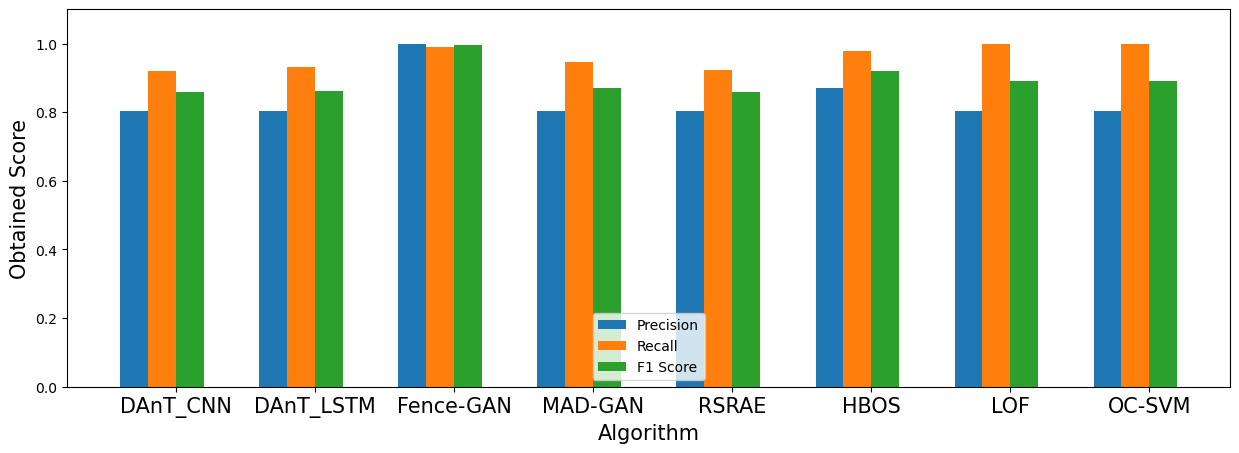

In [5]:
# Multi bar Chart
plt.bar(axis -0.3, pre, width=0.2, label = 'Precision')
plt.bar(axis -0.1, rec, width=0.2, label = 'Recall')
plt.bar(axis +0.1, f1s, width=0.2, label = 'F1 Score')

# Xticks
plt.xticks(axis, labels)

# Add legend
plt.legend(loc=8)
plt.ylim(0, 1.1)
plt.xlabel('Algorithm', fontsize=15)
plt.ylabel('Obtained Score',fontsize=15)

# Display
plt.show()

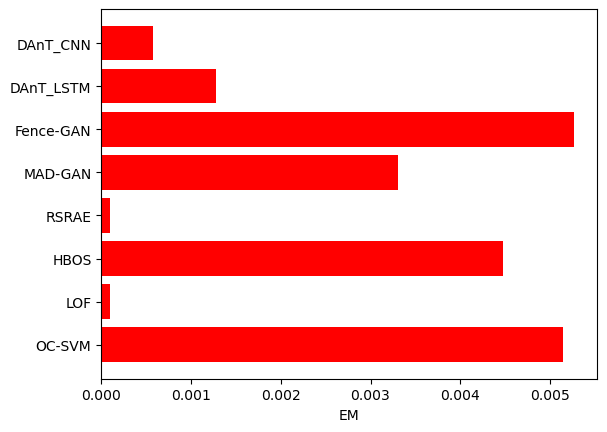

In [6]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ax.barh(axis, em, align='center', color='red')
ax.set_yticks(axis, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('EM')
#ax.set_title('How fast do you want to go today?')

plt.show()

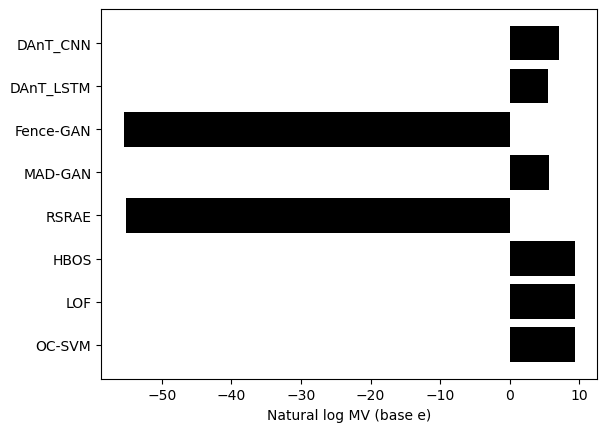

In [7]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ax.barh(axis, mv, align='center', color='black')
ax.set_yticks(axis, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Natural log MV (base e)')
#plt.xlim(0, 2000)
#ax.set_title('How fast do you want to go today?')

plt.show()

In [9]:
dataset = "gm"
file_path = 'data/financial_data/Stocks/' + dataset + '.us.txt'
tscv_list = data_utils.load_stock_as_crossvalidated_timeseries(file_path, 1, 1, 1, bs=None, normalise=True, load_as_dl=False)

Text(0, 0.5, 'Intra-Day Change / Raw Sentiment Score')

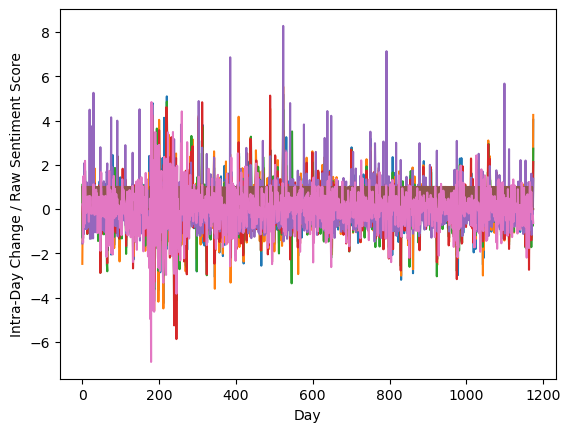

In [10]:
series = tscv_list[4][0].squeeze()#[:, 1]
plt.plot(series)
plt.xlabel('Day')
plt.ylabel('Intra-Day Change / Raw Sentiment Score')

Text(0, 0.5, 'Change in price')

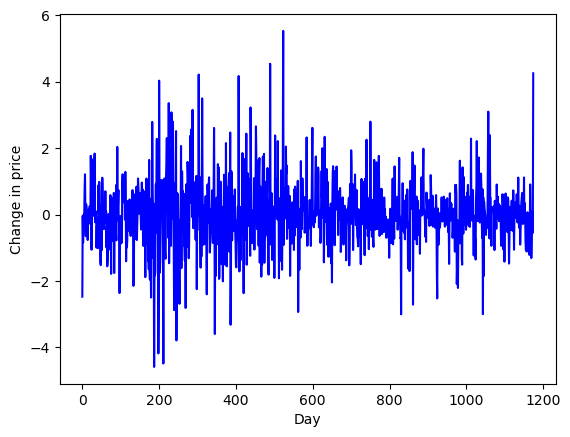

In [11]:
series = tscv_list[4][0].squeeze()[:, 1]
plt.plot(series, color = "blue")
plt.xlabel('Day')
plt.ylabel('Change in price')

Text(0, 0.5, 'Price')

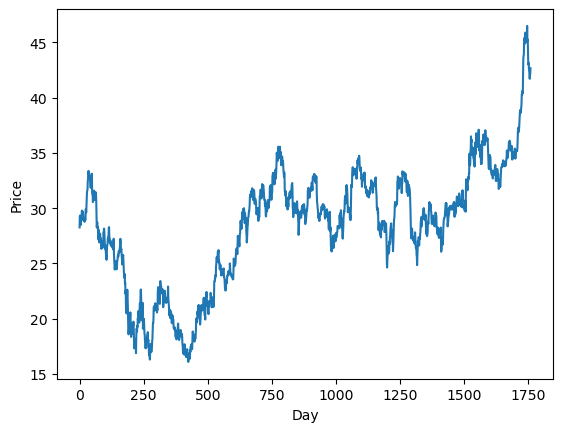

In [12]:
df = data_utils.load_stock(file_path)
price = df['Close'].values
plt.plot(price)
plt.xlabel('Day')
plt.ylabel('Price')